# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/ReviewLawsonDKIJakarta-.csv")
df.head()

,lawson_name,name,rating,review
0,Lawson - WOLTER,Mochammad Haikal,5.0,"The place is very clean, i could sleep on the ..."
1,Lawson - WOLTER,Nissa Rufy,5.0,Good service
2,Lawson - WOLTER,Zaki Fadhlurrahman,5.0,Good service from the staff!!!
3,Lawson - WOLTER,Fitri Ramadhani,5.0,"Pelayanannya ramah dan cepat,makanannya enak e..."
4,Lawson - WOLTER,firda salma,5.0,"Makanannya enak enak banyak promonya,tempatnya..."


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['review', 'name']]
df

,review,name
0,"The place is very clean, i could sleep on the ...",Mochammad Haikal
1,Good service,Nissa Rufy
2,Good service from the staff!!!,Zaki Fadhlurrahman
3,"Pelayanannya ramah dan cepat,makanannya enak e...",Fitri Ramadhani
4,"Makanannya enak enak banyak promonya,tempatnya...",firda salma
...,...,...
175,Cozy place,Yuri Ananda
176,Top,Azmy Shiddiq
177,"Kamar mandinya kotor banget 😅, meja meja juga ...",Dona Paramita
178,Berlari ke lawson cipete raya cuma buat cobain...,Repita Nuringtyas


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  180 non-null    object
 1   name    180 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,review,name
count,180,180
unique,174,177
top,Good,Gb Jkt
freq,4,2


# **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(180, 2)

In [12]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['review'])

In [13]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [14]:
# Menghapus data yang kosong
df = df.dropna()

In [15]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

review    0
name      0
dtype: int64

In [16]:
df.shape

(174, 2)

In [17]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [18]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [19]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'review'
df['review'] = df['review'].apply(clean_review_text, remove_emojis).str.lower()
df

,review,name
0,the place is very clean i could sleep on the f...,Mochammad Haikal
1,good service,Nissa Rufy
2,good service from the staff,Zaki Fadhlurrahman
3,pelayanannya ramah dan cepatmakanannya enak en...,Fitri Ramadhani
4,makanannya enak enak banyak promonyatempatnya ...,firda salma
...,...,...
174,comfy,Uus Uswatun Hasanah
175,cozy place,Yuri Ananda
177,kamar mandinya kotor banget meja meja juga kot...,Dona Paramita
178,berlari ke lawson cipete raya cuma buat cobain...,Repita Nuringtyas


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [21]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['review'] = df['review'].apply(lambda x: normalisasi(x))
df

,review,name
0,the place is very clean i could sleep on the f...,Mochammad Haikal
1,good service,Nissa Rufy
2,good service from the staff,Zaki Fadhlurrahman
3,pelayanannya ramah dan cepatmakanannya enak en...,Fitri Ramadhani
4,makanannya enak enak banyak promonyatempatnya ...,firda salma
...,...,...
174,comfy,Uus Uswatun Hasanah
175,cozy place,Yuri Ananda
177,kamar mandinya kotor banget meja meja juga kot...,Dona Paramita
178,berlari ke lawson cipete raya cuma buat cobain...,Repita Nuringtyas


In [22]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [23]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['review'] = df['review'].apply(lambda x: stopwords(x))
df

,review,name
0,the place is very clean i could sleep on the f...,Mochammad Haikal
1,good service,Nissa Rufy
2,good service from the staff,Zaki Fadhlurrahman
3,pelayanannya ramah cepatmakanannya enak enak b...,Fitri Ramadhani
4,makanannya enak enak banyak promonyatempatnya ...,firda salma
...,...,...
174,comfy,Uus Uswatun Hasanah
175,cozy place,Yuri Ananda
177,kamar mandinya kotor banget meja meja kotor tp...,Dona Paramita
178,berlari lawson cipete raya cuma buat cobain es...,Repita Nuringtyas


In [25]:
# Tokenize
tokenized = df['review'].apply(lambda x:x.split())
tokenized

0      [the, place, is, very, clean, i, could, sleep,...
1                                        [good, service]
2                      [good, service, from, the, staff]
3      [pelayanannya, ramah, cepatmakanannya, enak, e...
4      [makanannya, enak, enak, banyak, promonyatempa...
                             ...                        
174                                              [comfy]
175                                        [cozy, place]
177    [kamar, mandinya, kotor, banget, meja, meja, k...
178    [berlari, lawson, cipete, raya, cuma, buat, co...
179    [tempat, parkir, lega, tempat, nongkrong, di, ...
Name: review, Length: 174, dtype: object

In [26]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_LawsonDKIJakarta_1.csv', index = False)


In [27]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_LawsonDKIJakarta_1.csv', encoding = 'latin1')
df_clean

,review
0,the place is very clean i could sleep on the f...
1,good service
2,good service from the staff
3,layan ramah cepatmakanannya enak enak banyak p...
4,makan enak enak banyak promonyatempatnya enak ...
...,...
169,comfy
170,cozy place
171,kamar mandi kotor banget meja meja kotor tp le...
172,lari lawson cipete raya cuma buat cobain es se...


# **Translate**

In [28]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [29]:
import pandas as pd
from easynmt import EasyNMT

In [30]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_LawsonDKIJakarta_1.csv', encoding='latin1')

In [31]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [32]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 2.09MB/s]                   


In [33]:
df2 = df_clean.fillna(method = 'pad')
df2

,review
0,the place is very clean i could sleep on the f...
1,good service
2,good service from the staff
3,layan ramah cepatmakanannya enak enak banyak p...
4,makan enak enak banyak promonyatempatnya enak ...
...,...
169,comfy
170,cozy place
171,kamar mandi kotor banget meja meja kotor tp le...
172,lari lawson cipete raya cuma buat cobain es se...


In [35]:
df2['review_en'] = df2['review'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_LawsonDKIJakarta_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [36]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_LawsonDKIJakarta_1.csv')
df2

,Unnamed: 0,review,review_en
0,0,the place is very clean i could sleep on the f...,the place is very clean I could sleep on the f...
1,1,good service,good service
2,2,good service from the staff,good service from the staff
3,3,layan ramah cepatmakanannya enak enak banyak p...,Quick friendly layout. Food's good. Lots of pr...
4,4,makan enak enak banyak promonyatempatnya enak ...,It's good to eat. There's a lot of promos. It'...
...,...,...,...
169,169,comfy,comfy
170,170,cozy place,cozy place
171,171,kamar mandi kotor banget meja meja kotor tp le...,"The bathroom is dirty. The table is dirty, but..."
172,172,lari lawson cipete raya cuma buat cobain es se...,"I was just trying to try some fun ice, bru. Se..."


# **Labeling**

In [37]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_LawsonDKIJakarta_1.csv')
df2

,Unnamed: 0,review,review_en
0,0,the place is very clean i could sleep on the f...,the place is very clean I could sleep on the f...
1,1,good service,good service
2,2,good service from the staff,good service from the staff
3,3,layan ramah cepatmakanannya enak enak banyak p...,Quick friendly layout. Food's good. Lots of pr...
4,4,makan enak enak banyak promonyatempatnya enak ...,It's good to eat. There's a lot of promos. It'...
...,...,...,...
169,169,comfy,comfy
170,170,cozy place,cozy place
171,171,kamar mandi kotor banget meja meja kotor tp le...,"The bathroom is dirty. The table is dirty, but..."
172,172,lari lawson cipete raya cuma buat cobain es se...,"I was just trying to try some fun ice, bru. Se..."


In [38]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [39]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
data_review = list(df2['review_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 121
Netral = 32
Negatif = 21

Total Data Seluruhnya : 174


In [42]:
df2['sentimen'] = status
df2

,Unnamed: 0,review,review_en,sentimen
0,0,the place is very clean i could sleep on the f...,the place is very clean I could sleep on the f...,Positif
1,1,good service,good service,Positif
2,2,good service from the staff,good service from the staff,Positif
3,3,layan ramah cepatmakanannya enak enak banyak p...,Quick friendly layout. Food's good. Lots of pr...,Positif
4,4,makan enak enak banyak promonyatempatnya enak ...,It's good to eat. There's a lot of promos. It'...,Positif
...,...,...,...,...
169,169,comfy,comfy,Netral
170,170,cozy place,cozy place,Negatif
171,171,kamar mandi kotor banget meja meja kotor tp le...,"The bathroom is dirty. The table is dirty, but...",Negatif
172,172,lari lawson cipete raya cuma buat cobain es se...,"I was just trying to try some fun ice, bru. Se...",Positif


In [43]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,review,review_en,sentimen
0,the place is very clean i could sleep on the f...,the place is very clean I could sleep on the f...,Positif
1,good service,good service,Positif
2,good service from the staff,good service from the staff,Positif
3,layan ramah cepatmakanannya enak enak banyak p...,Quick friendly layout. Food's good. Lots of pr...,Positif
4,makan enak enak banyak promonyatempatnya enak ...,It's good to eat. There's a lot of promos. It'...,Positif
...,...,...,...
169,comfy,comfy,Netral
170,cozy place,cozy place,Negatif
171,kamar mandi kotor banget meja meja kotor tp le...,"The bathroom is dirty. The table is dirty, but...",Negatif
172,lari lawson cipete raya cuma buat cobain es se...,"I was just trying to try some fun ice, bru. Se...",Positif


# **Visualisasi**


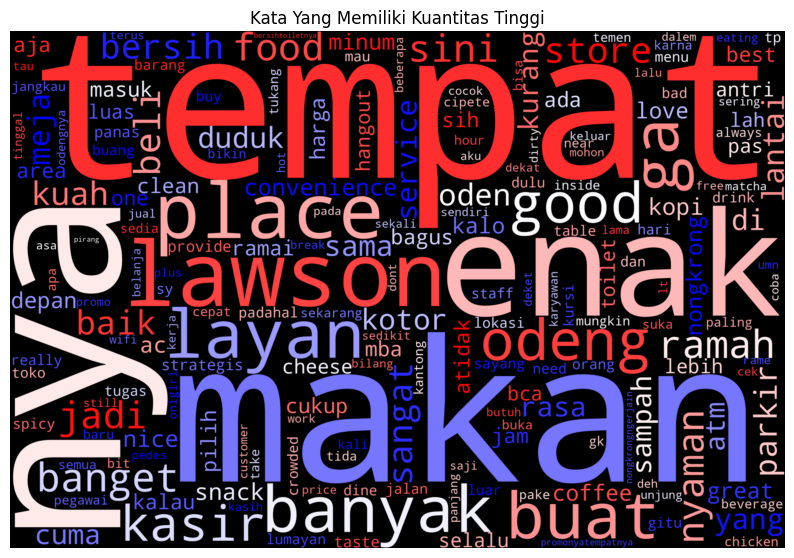

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['review']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


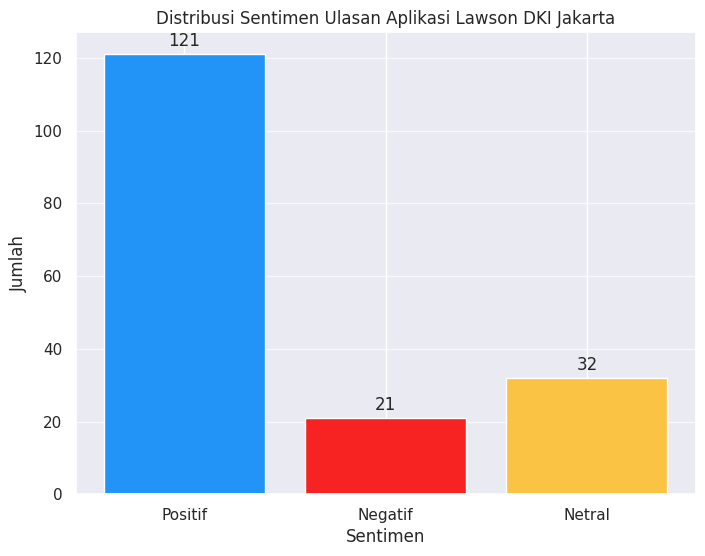

In [46]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Lawson DKI Jakarta")


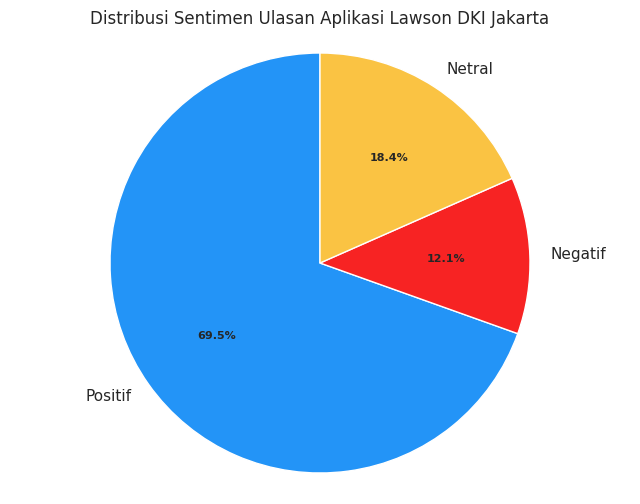

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Lawson DKI Jakarta")

In [48]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,review,review_en,sentimen
0,the place is very clean i could sleep on the f...,the place is very clean I could sleep on the f...,Positif
1,good service,good service,Positif
2,good service from the staff,good service from the staff,Positif
3,layan ramah cepatmakanannya enak enak banyak p...,Quick friendly layout. Food's good. Lots of pr...,Positif
4,makan enak enak banyak promonyatempatnya enak ...,It's good to eat. There's a lot of promos. It'...,Positif
...,...,...,...
168,bad service,bad service,Negatif
170,cozy place,cozy place,Negatif
171,kamar mandi kotor banget meja meja kotor tp le...,"The bathroom is dirty. The table is dirty, but...",Negatif
172,lari lawson cipete raya cuma buat cobain es se...,"I was just trying to try some fun ice, bru. Se...",Positif


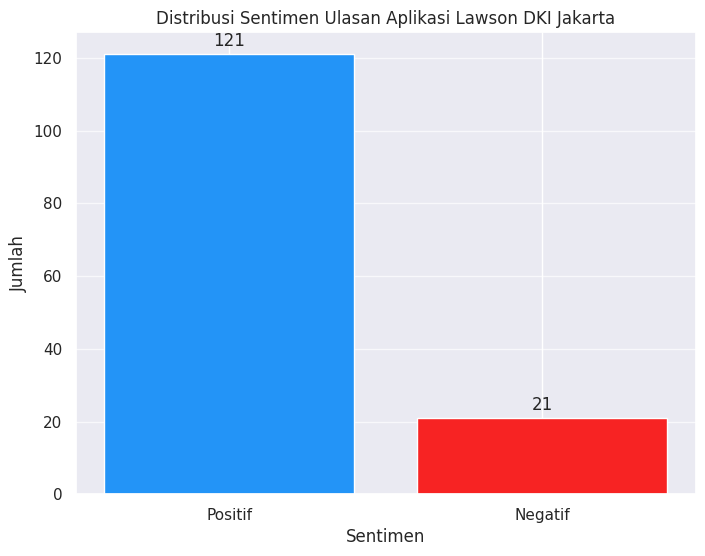

In [49]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Lawson DKI Jakarta")


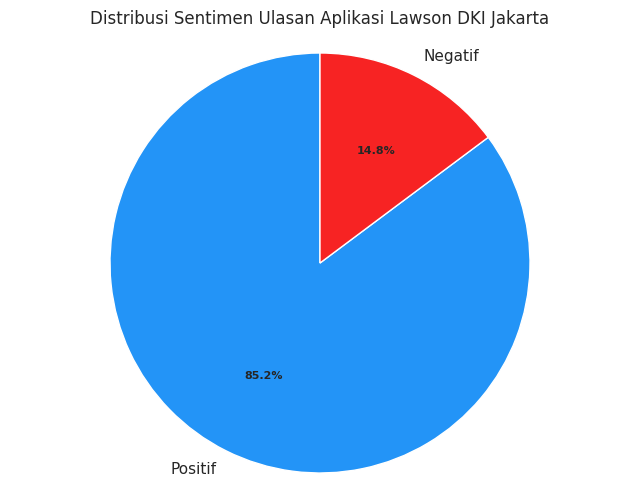

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Lawson DKI Jakarta")

In [51]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,review,review_en,sentimen
0,the place is very clean i could sleep on the f...,the place is very clean I could sleep on the f...,1
1,good service,good service,1
2,good service from the staff,good service from the staff,1
3,layan ramah cepatmakanannya enak enak banyak p...,Quick friendly layout. Food's good. Lots of pr...,1
4,makan enak enak banyak promonyatempatnya enak ...,It's good to eat. There's a lot of promos. It'...,1
...,...,...,...
168,bad service,bad service,0
170,cozy place,cozy place,0
171,kamar mandi kotor banget meja meja kotor tp le...,"The bathroom is dirty. The table is dirty, but...",0
172,lari lawson cipete raya cuma buat cobain es se...,"I was just trying to try some fun ice, bru. Se...",1


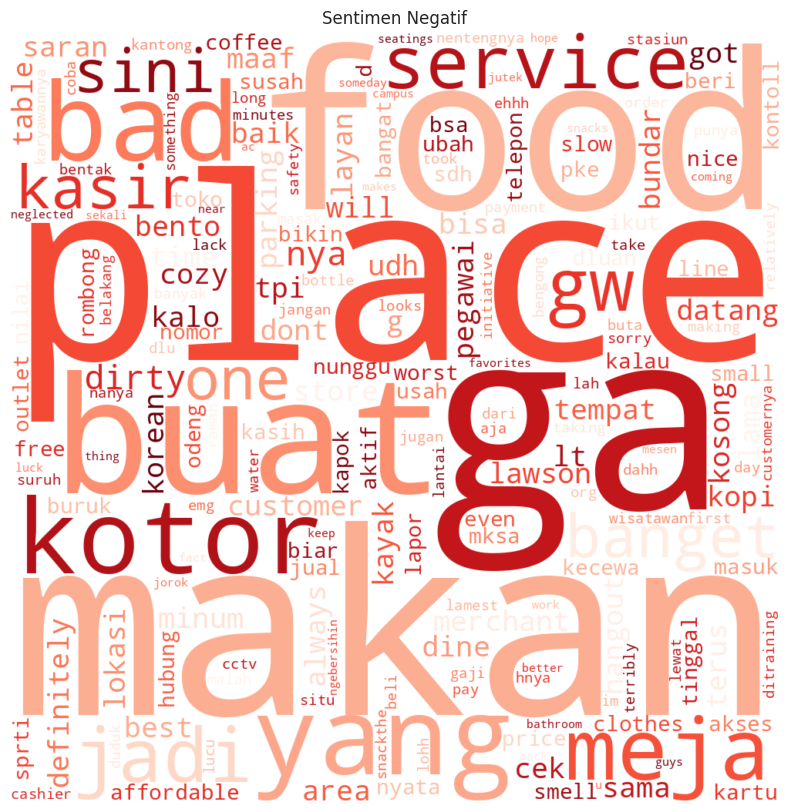

In [54]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['review']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

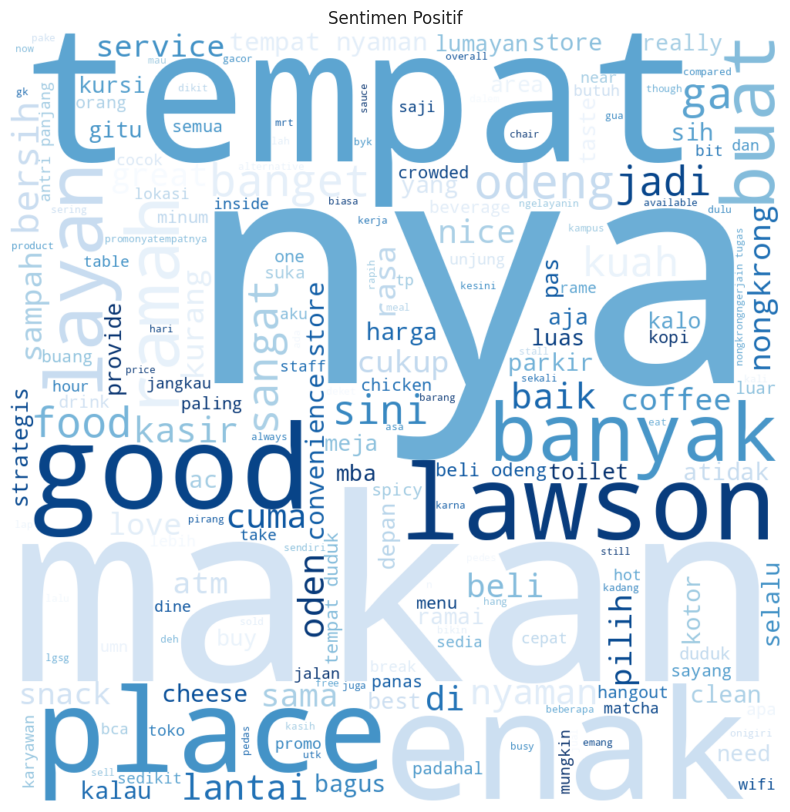

In [55]:
all_words = ' '.join([reviews for reviews in data_positif['review']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [56]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
1    121
0     21
Name: count, dtype: int64

# **Data Preparation**

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
# Memisahkan data menjadi data latih dan data uji
X = data['review']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [60]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

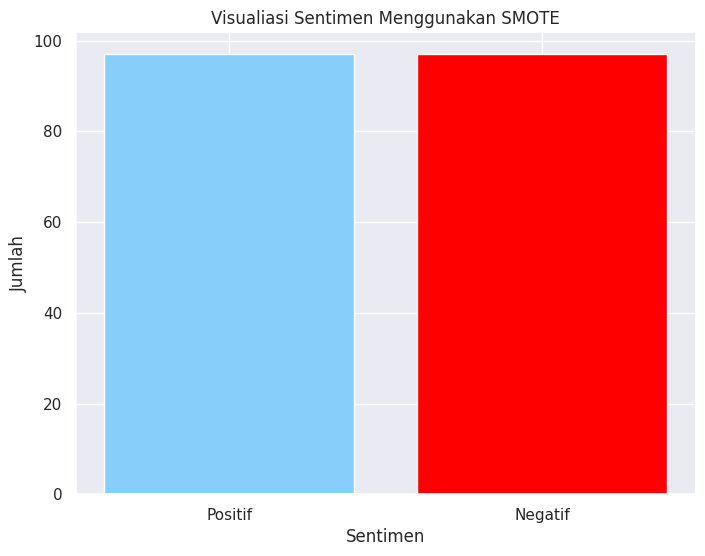

In [61]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue', 'orange'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [62]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [63]:
y_pred = naive_bayes.predict(X_test_vec)

In [64]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7241379310344828

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.20      0.20      0.20         5
     Positif       0.83      0.83      0.83        24

    accuracy                           0.72        29
   macro avg       0.52      0.52      0.52        29
weighted avg       0.72      0.72      0.72        29



In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 1  4]
 [ 4 20]]

Accuracy =  0.7241379310344828


In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 1  4]
 [ 4 20]]

True Positives (TP) =  1

True Negatives (TN) =  20

False Positives (FP) =  4

False Negatives (FN) =  4

Accuracy =  0.7241379310344828


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

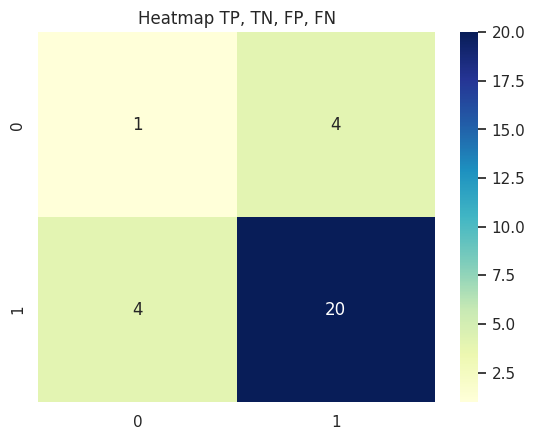

In [67]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1'],
                         index=['0', '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [68]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [69]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7241


In [70]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2759


# **Testing**


In [71]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : tempatnya bagus
Hasil Analisis Sentimen Untuk Teks Baru : Positif


In [75]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : kapok makan disini tempatnya kotor bgt
Hasil Analisis Sentimen Untuk Teks Baru : Negatif
